# Different SST gradient time-record trends

This Jupyter notebook reproduces the Extended Data Figure 2 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import truncate_colormap, ccrs_land, vectorize, add_patches

In [3]:
SST_trend_dataset = xr.open_dataset('../../datasets/SST_grads_trends.nc')
SST_trend_full_record_dataset = xr.open_dataset('../../datasets/SST_grads_trends_full_record.nc')

In [4]:
SST_trend = SST_trend_dataset.trend*10*365
SST_FR_trend = SST_trend_full_record_dataset.trend*10*365

In [5]:
SST_signif = SST_trend_dataset.signif.where(SST_trend_dataset.signif==1)
SST_FR_signif = SST_trend_full_record_dataset.signif.where(SST_trend_full_record_dataset.signif==1)

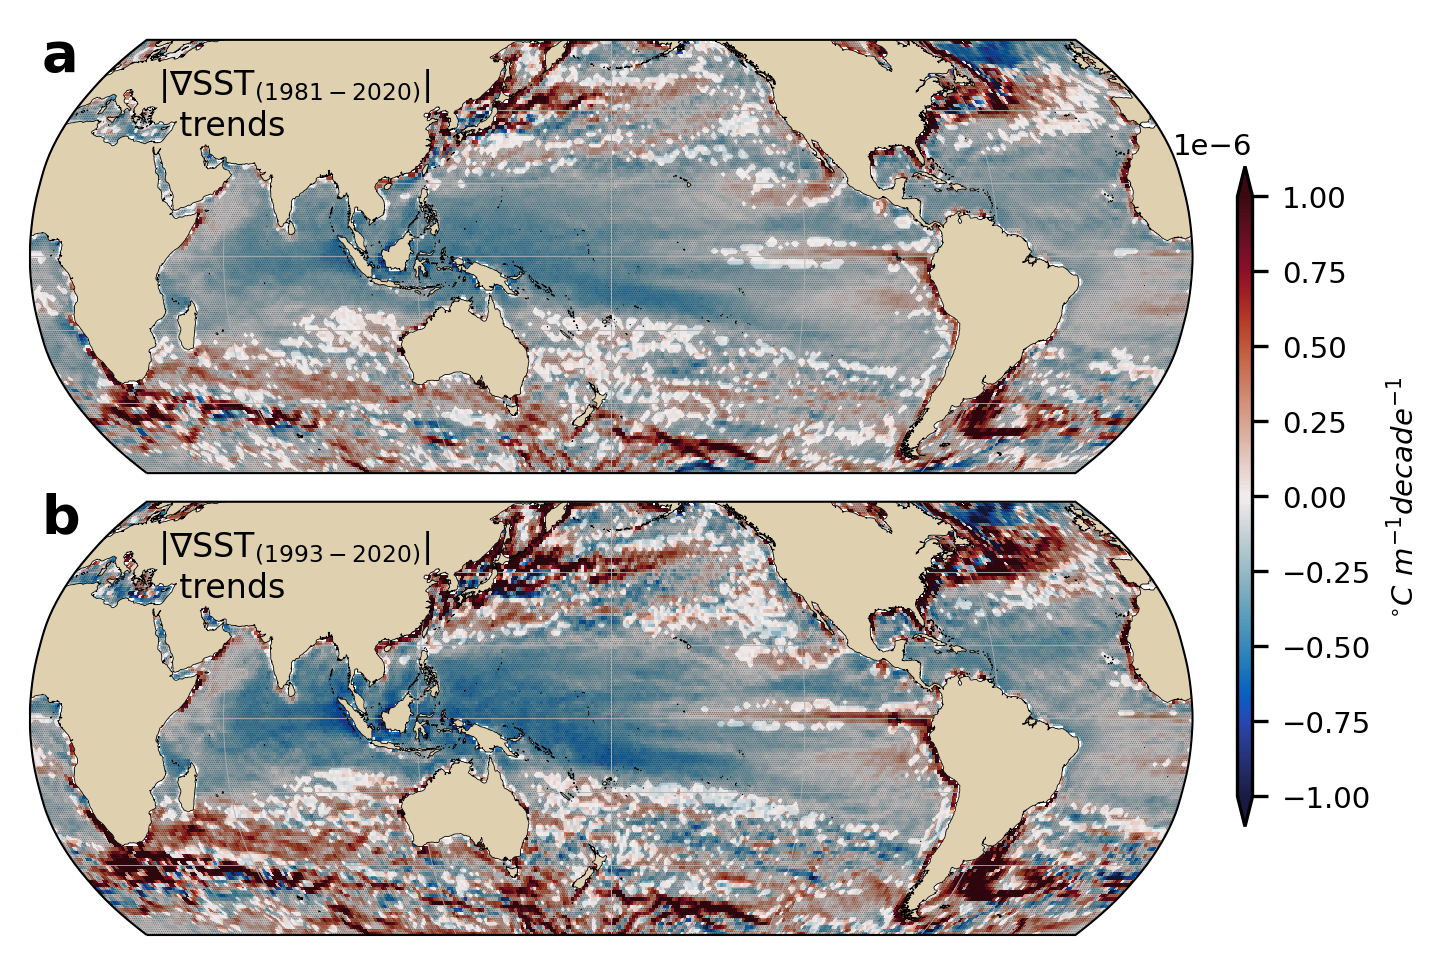

In [6]:
plt.rcParams['xtick.major.pad']='1'
plt.rc('hatch', color='k', linewidth=0.03)

fig = plt.figure(figsize=(5, 4),dpi=300)

##################################################################################################
## Subplot##
##################################################################################################

ax1=fig.add_subplot(2, 1, 2,projection= ccrs.Robinson(central_longitude=180))
clm = SST_trend.plot(vmin=-1e-6,vmax=1e-6,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True, add_colorbar=False)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land, zorder=2)
add_patches(ax1)

ax1.spines['geo'].set_linewidth(0.5)

ax1.set_title("",fontsize=8)
gl=ax1.gridlines(linewidth=0.2)

cs = SST_signif.plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'],add_colorbar=False)
vectorize(cs)
    
###############################################################
ax2=fig.add_subplot(2, 1, 1,projection= ccrs.Robinson(central_longitude=180))
SST_FR_trend.plot(vmin=-1e-6,vmax=1e-6,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True, add_colorbar=False)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land, zorder=2)
add_patches(ax2)

ax2.spines['geo'].set_linewidth(0.5)

ax2.set_title("",fontsize=8)
gl=ax2.gridlines(linewidth=0.2)

cs = SST_FR_signif.plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

ax2.text(0.01,0.93,'a',fontweight='bold',fontsize=13,transform=ax2.transAxes)
ax1.text(0.01,0.93,'b',fontweight='bold',fontsize=13,transform=ax1.transAxes)


ax2.text(0.11,0.78,r'$|\nabla \mathrm{SST}_{(1981-2020)}|$' '\n' '  trends',fontsize=8,transform=ax2.transAxes)
ax1.text(0.11,0.78,r'$|\nabla \mathrm{SST}_{(1993-2020)}|$' '\n' '  trends',fontsize=8,transform=ax1.transAxes)

cbar_ax = fig.add_axes([0.93, 0.22, 0.01, 0.55])
cbar=fig.colorbar(clm, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('$^{\circ}C\ m^{-1} decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

plt.subplots_adjust(hspace=0.04)

plt.savefig('../../LaTeX/figures/global_SST_diff_time_records.pdf',dpi=300,bbox_inches='tight')

**Extended Data Figure 2 | Sea surface temperature gradient magnitude trends for periods between 1981-2020 and 1993-2020.** Gray stippling shows regions that are statistically significant above the 95% confidence level.
